In [97]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import find_peaks


In [98]:
exp_data = pd.read_csv('turb_test.csv')

In [99]:
exp_data['timestamp'] = pd.to_datetime(exp_data['timestamp'])

In [100]:
peaks_high, props_high = find_peaks(exp_data['light_sec'], height=100, distance=10)

peaks_low, props_low = find_peaks(-exp_data['light_sec'], height=-91.5, distance=10)

# peaks_low
# props_low['peak_heights']

# peaks_high
# props_high['peak_heights']

In [101]:
peaks_low, props_low = find_peaks(-exp_data['light_sec'], height=-91.5, distance=10)

peaks_low
props_low['peak_heights']

array([-91., -91., -91., -91., -90.])

In [102]:
growth_intervall = []
for i in range(len(peaks_low)):
    growth_data = exp_data.iloc[peaks_high[i]:peaks_low[i]]
    growth_intervall.append(growth_data)

growth_curves = {}
for j in range(len(growth_intervall)):    
    table = growth_intervall[j]
    s = [i * 300 /60 for i in range(len(table['timestamp']))] 
    x = [i for i in range(peaks_high[j],peaks_low[j])]
    y = table['light_sec']
    slope, intercept = np.polyfit(x, y, 1)
    f = np.poly1d((slope, intercept))
    ys = f(x)
    growth_curves[j] = [x, ys, slope, intercept, s]
    
    

In [103]:
len(growth_curves)

5

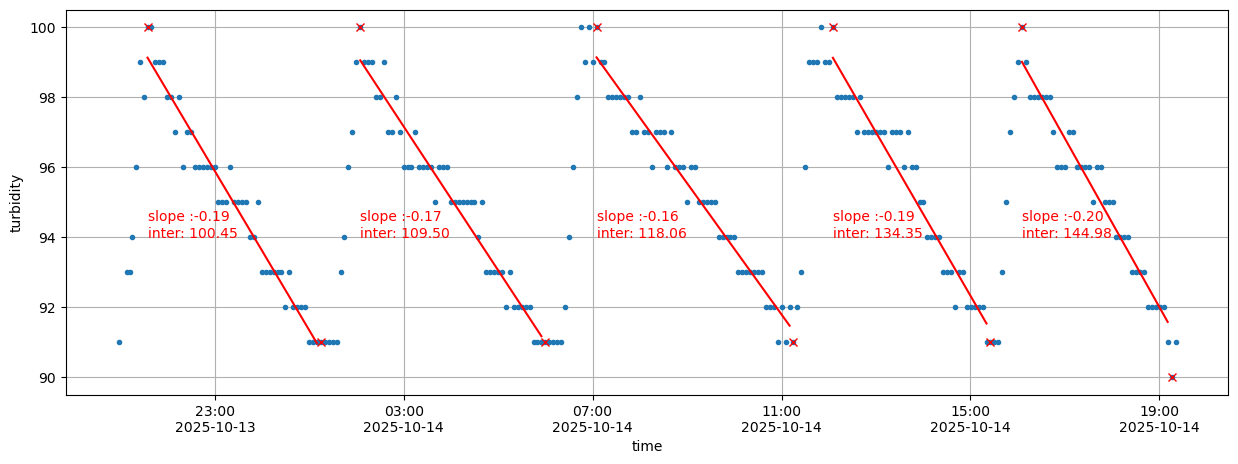

In [106]:
fig, ax  = plt.subplots(figsize=(15,5))

ax.plot(exp_data['timestamp'], exp_data['light_sec'], '.')

for k in range(len(growth_curves)):
    ax.plot(exp_data['timestamp'].iloc[growth_curves[k][0]],growth_curves[k][1], 'r')
    ax.text(exp_data['timestamp'].iloc[growth_curves[k][0][0]], 94, f'slope :{growth_curves[k][2]:.2f}\ninter: {growth_curves[k][3]:.2f}', color='red')
ax.plot(exp_data['timestamp'].iloc[peaks_high],props_high['peak_heights'], 'rx')
ax.plot(exp_data['timestamp'].iloc[peaks_low], -props_low['peak_heights'], 'rx')
ax.set_ylabel('turbidity')
ax.set_xlabel('time')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%Y-%m-%d'))
plt.grid()
plt.show()

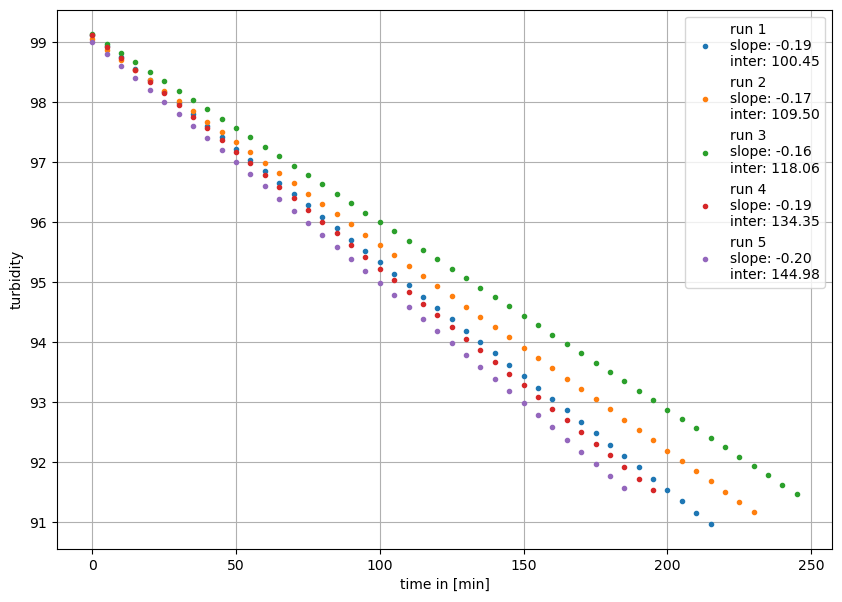

In [105]:
fig, ax  = plt.subplots(figsize=(10,7))

for k in range(len(growth_curves)):
    ax.plot(growth_curves[k][4],growth_curves[k][1], '.', label=f'run {k+1}\nslope: {growth_curves[k][2]:.2f}\ninter: {growth_curves[k][3]:.2f}')
    # ax.text(exp_data['timestamp'].iloc[growth_curves[k][0][5]], 94, f'slope :{growth_curves[k][2]:.2f}\ninter: {growth_curves[k][3]:.2f}', color='red')
ax.set_ylabel('turbidity')
ax.set_xlabel('time in [min]')
plt.legend() 
plt.grid()
plt.show()